# Project Proposal

## Introduction

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
Clearly state the question you will try to answer with your project
Identify and describe the dataset that will be used to answer the question

The dataset contains data regarding heart disease patients and relavant information such as sex, age, cholestral, max heart rate and more. Other columns include more technical terms, but many we will not be using as predictors. 

Heart disease refers to several types of heart related sicknesses such as heart attacks, unstable angina and may more. This data set categorizes the result of the patient's diagnosis to 4 types of categories: !!!. 



## Preliminary exploratory data analysis:

In [14]:
 ### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

Link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Cleaning and Reading the Data

In [15]:
heart_disease <- read_csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"),
                         col_names = FALSE)

colnames(heart_disease) <- c("age", "sex", "chest_pain_type", "rbp", "cholesterol", 
                      "fbs", "rer",
                      "max_heart_rate","eia", "STdep",
                      "slope","ca", "thal", "num")

heart_disease <- heart_disease |>
                    mutate(sex = as_factor(sex), fbs = as_factor(fbs), 
                           rer = as_factor(rer), eia = as_factor(eia),
                           slope = as_factor(slope), num = as_factor(num),
                           chest_pain_type = as_factor(chest_pain_type))
heart_disease <- heart_disease|> mutate(eia = (1=="yes")&&(0=="no"))
                  
heart_disease



Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,rbp,cholestral,fbs,rer,max_heart_rate,eia,STdep,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<lgl>,<dbl>,<fct>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,FALSE,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,FALSE,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,FALSE,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,FALSE,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,FALSE,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,FALSE,0.0,1,?,3.0,0


In [16]:
 # Splitting the data
heart_split <- initial_split(heart_disease, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [17]:
## Table of data analysis

# Getting the mean of the age 
average_age <- heart_train |> summarise(mean(age))

# Number of observations

num_obs <- tibble(nrow(heart_train))

# average of serum cholestral, used as a predictor

avg_chol <- heart_train |> summarise(mean(cholesterol))

data_analysis <- bind_cols(num_obs, average_age, avg_chol)

colnames(data_analysis)  <- c("Number of Observations", "Average Age", "Average Cholesterol")

data_analysis

Number of Observations,Average Age,Average Cholestral
<int>,<dbl>,<dbl>
226,54.52212,245.0619


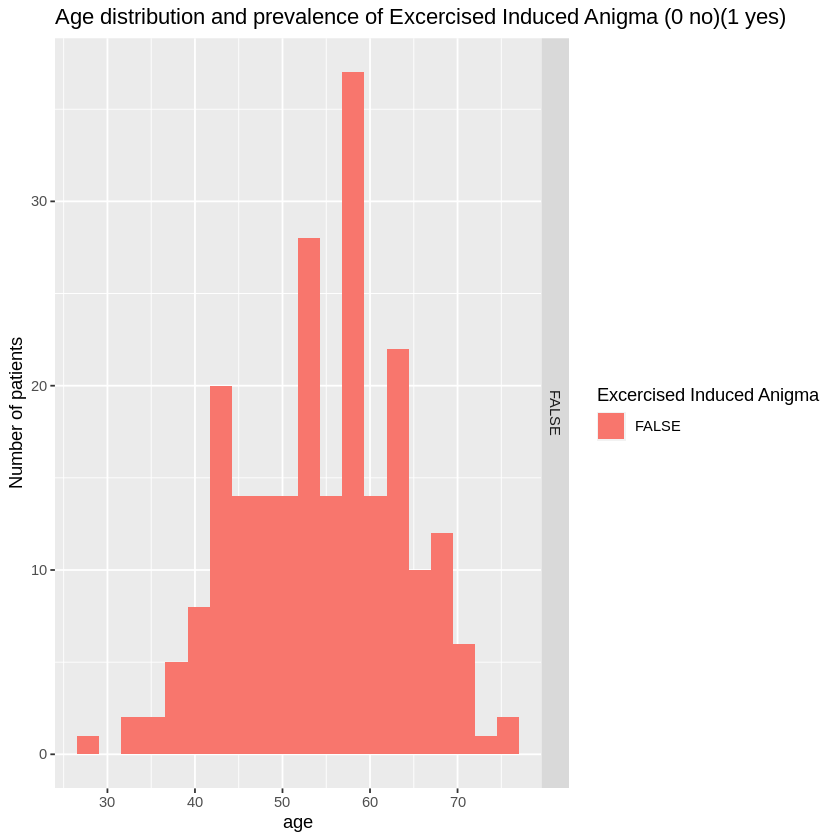

In [18]:
# plotting for data analysis
age_dist <- heart_train |> ggplot(aes(x=age, fill = eia)) + geom_histogram(position = "dodge", bins = 20) + 
            facet_grid(rows = vars(eia)) + 
            labs(x = "age", y="Number of patients", fill = "Excercised Induced Anigma") +
            ggtitle("Age distribution and prevalence of Excercised Induced Anigma (0 no)(1 yes)")
age_dist



num: diagnosis of heart disease (angiographic disease status)

4 sex: sex (1 = male; 0 = female)

-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

(in any major vessel: attributes 59 through 68 are vessels)

ca: number of major vessels (0-3) colored by flourosopy 

thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

slope: the slope of the peak exercise ST segment

-- Value 1: upsloping

-- Value 2: flat

-- Value 3: downsloping


exercise.induced.angina (1 = yes; 0 = no)

(fasting blood sugar_>_120 mg/dl)_(1_=_true;_0_=_false)

restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria



## Methods

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea.
- For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results

We will be using age, resting blood pressure, and resting heart rate as predictors for our data analysis.  

## Expected outcomes and significance:

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

We expected to find age as a leading predictor for heart disease. We also expect cholesterol to be a good predictor for specific heart disease too.  The impact of this could be very beneficial.  For example, people could be screened for high cholesterol levels as they get older to try and prevent heart disease.  If a person is older and is found to have high cholesterol, they could adapt a healthier lifestyle and prevent a heart attack or other disaster. Some future questions this could lead to include why age leads to an increased risk of heart disease, and how to help people who are genetically predisposed to have higher levels of cholesterol.